Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Loss between reconstruction and target image: 0.00000531


'\nstep = im_reels.shape[0] // 4\nreel1, reel2 = combine_in_out_imgs(im_reels[:step], -1), combine_in_out_imgs(im_reels[step:step * 2], -1)\nreel3, reel4 = combine_in_out_imgs(im_reels[step * 2: step * 3], -1), combine_in_out_imgs(im_reels[step*3:], -1)\n\nsplit_reel = combine_in_out_imgs((reel1, reel2, reel3, reel4), -2)\n\n\nplot_im(split_reel)\n'

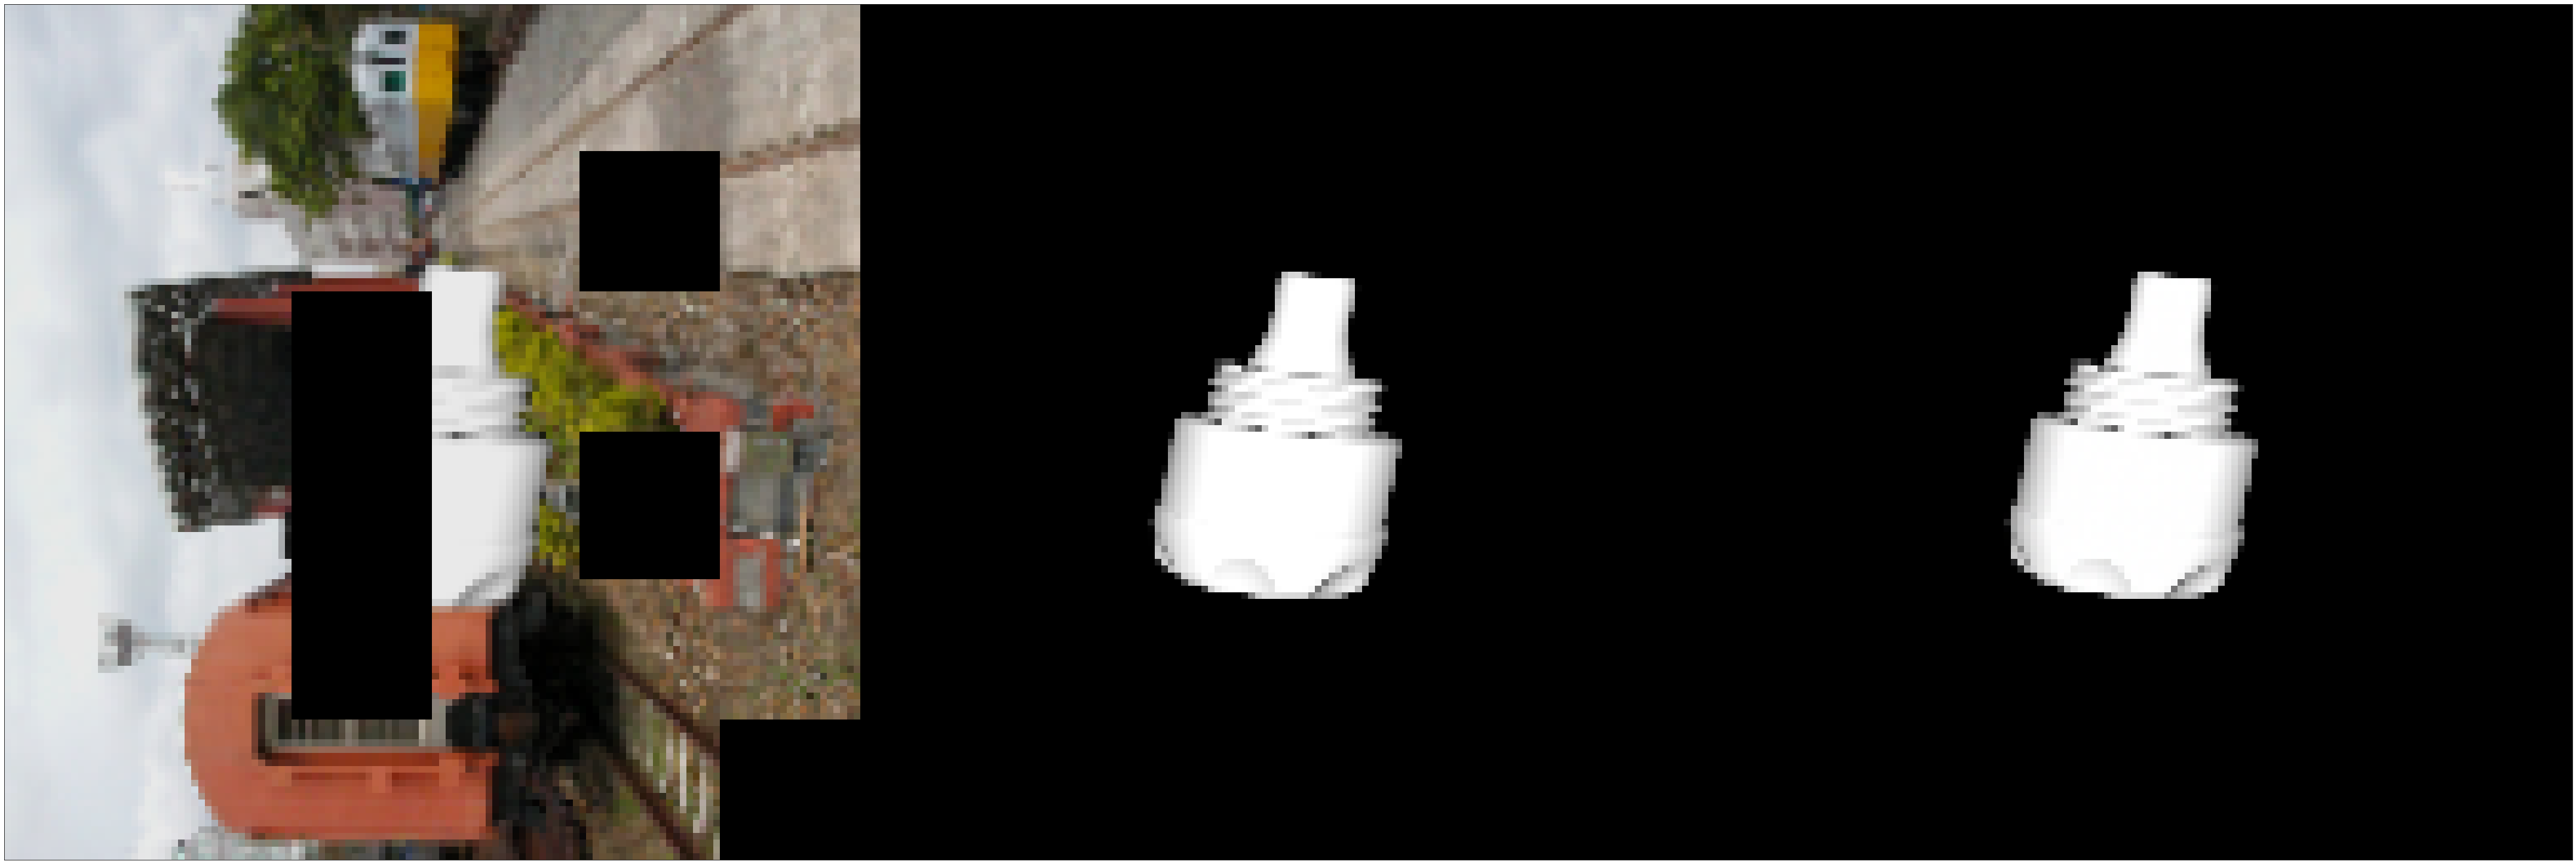

In [1]:
%matplotlib inline
from typing import List, Tuple

import cv2
import gin.torch
import matplotlib.pyplot as plt
import numpy as np
import torch
import wandb
from torch.utils.data import DataLoader
from tqdm.notebook import  tqdm

from src.aae.models import AugmentedAutoEncoder
from src.aae.dataset import OnlineRenderer

def plot_im(im, fig_size:Tuple[int, int]=(60, 30)):
    fig = plt.figure(figsize=fig_size, tight_layout=True)
    plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=False)
    fig.set_tight_layout(True)
    im = im.transpose(2, 1, 0) 
    plt.imshow(im)
    
    
def combine_in_out_imgs(imgs: List[np.array], axis: int) -> np.array:                                                                                                                      
    # NOTE: torch img dim (N, C, H, W) ¬
    return np.concatenate(imgs, axis=axis)     

class InfiniteIter:
    """
    Custom iterator that infinitely loops over a single provided data sample
    """
    def __init__(self, data, bs=64):
        self.__dict__.update(vars())
        
    def __iter__(self):
        self.n = 0
        return self
    
    def __next__(self):
        data = []
        for d in self.data:
            if isinstance(d, tuple):
                d = d[0]
            data.append(torch.stack([d] * self.bs))
        return data


@gin.configurable
def train_aae(num_workers: int=gin.REQUIRED,
              num_train_iters: int=gin.REQUIRED,
              save_interval: int=gin.REQUIRED,
              cache_interval: int=gin.REQUIRED,
              device: str=gin.REQUIRED):
    
    pass

gin.add_config_file_search_path('../')
gin.parse_config_file('../config/train/linemod/obj_0001.gin')


# Load model trained on a single image
loaded_ckpt = torch.load('./overfit_on_image.pth')

device = 'cuda'
model = AugmentedAutoEncoder()
model.load_state_dict(loaded_ckpt['model'])
model.to(device)

dl = loaded_ckpt['dataloader']
aug, label, _ = next(dl)
aug = aug.to(device)
label = label.to(device)
recon, _ = model(aug)

cached_recon = list(zip(aug.cpu().numpy(),
                          label.cpu().numpy(),
                          recon.detach().cpu().numpy()))

loss = model.loss(recon, label)
print(f"Loss between reconstruction and target image: {loss:.8f}")


im_reels = np.stack([combine_in_out_imgs(s, -2) for s in cached_recon])

combined_reel = combine_in_out_imgs(im_reels, -1)
plot_im(im_reels[0])


## Visualization of batched reconstrcutions

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


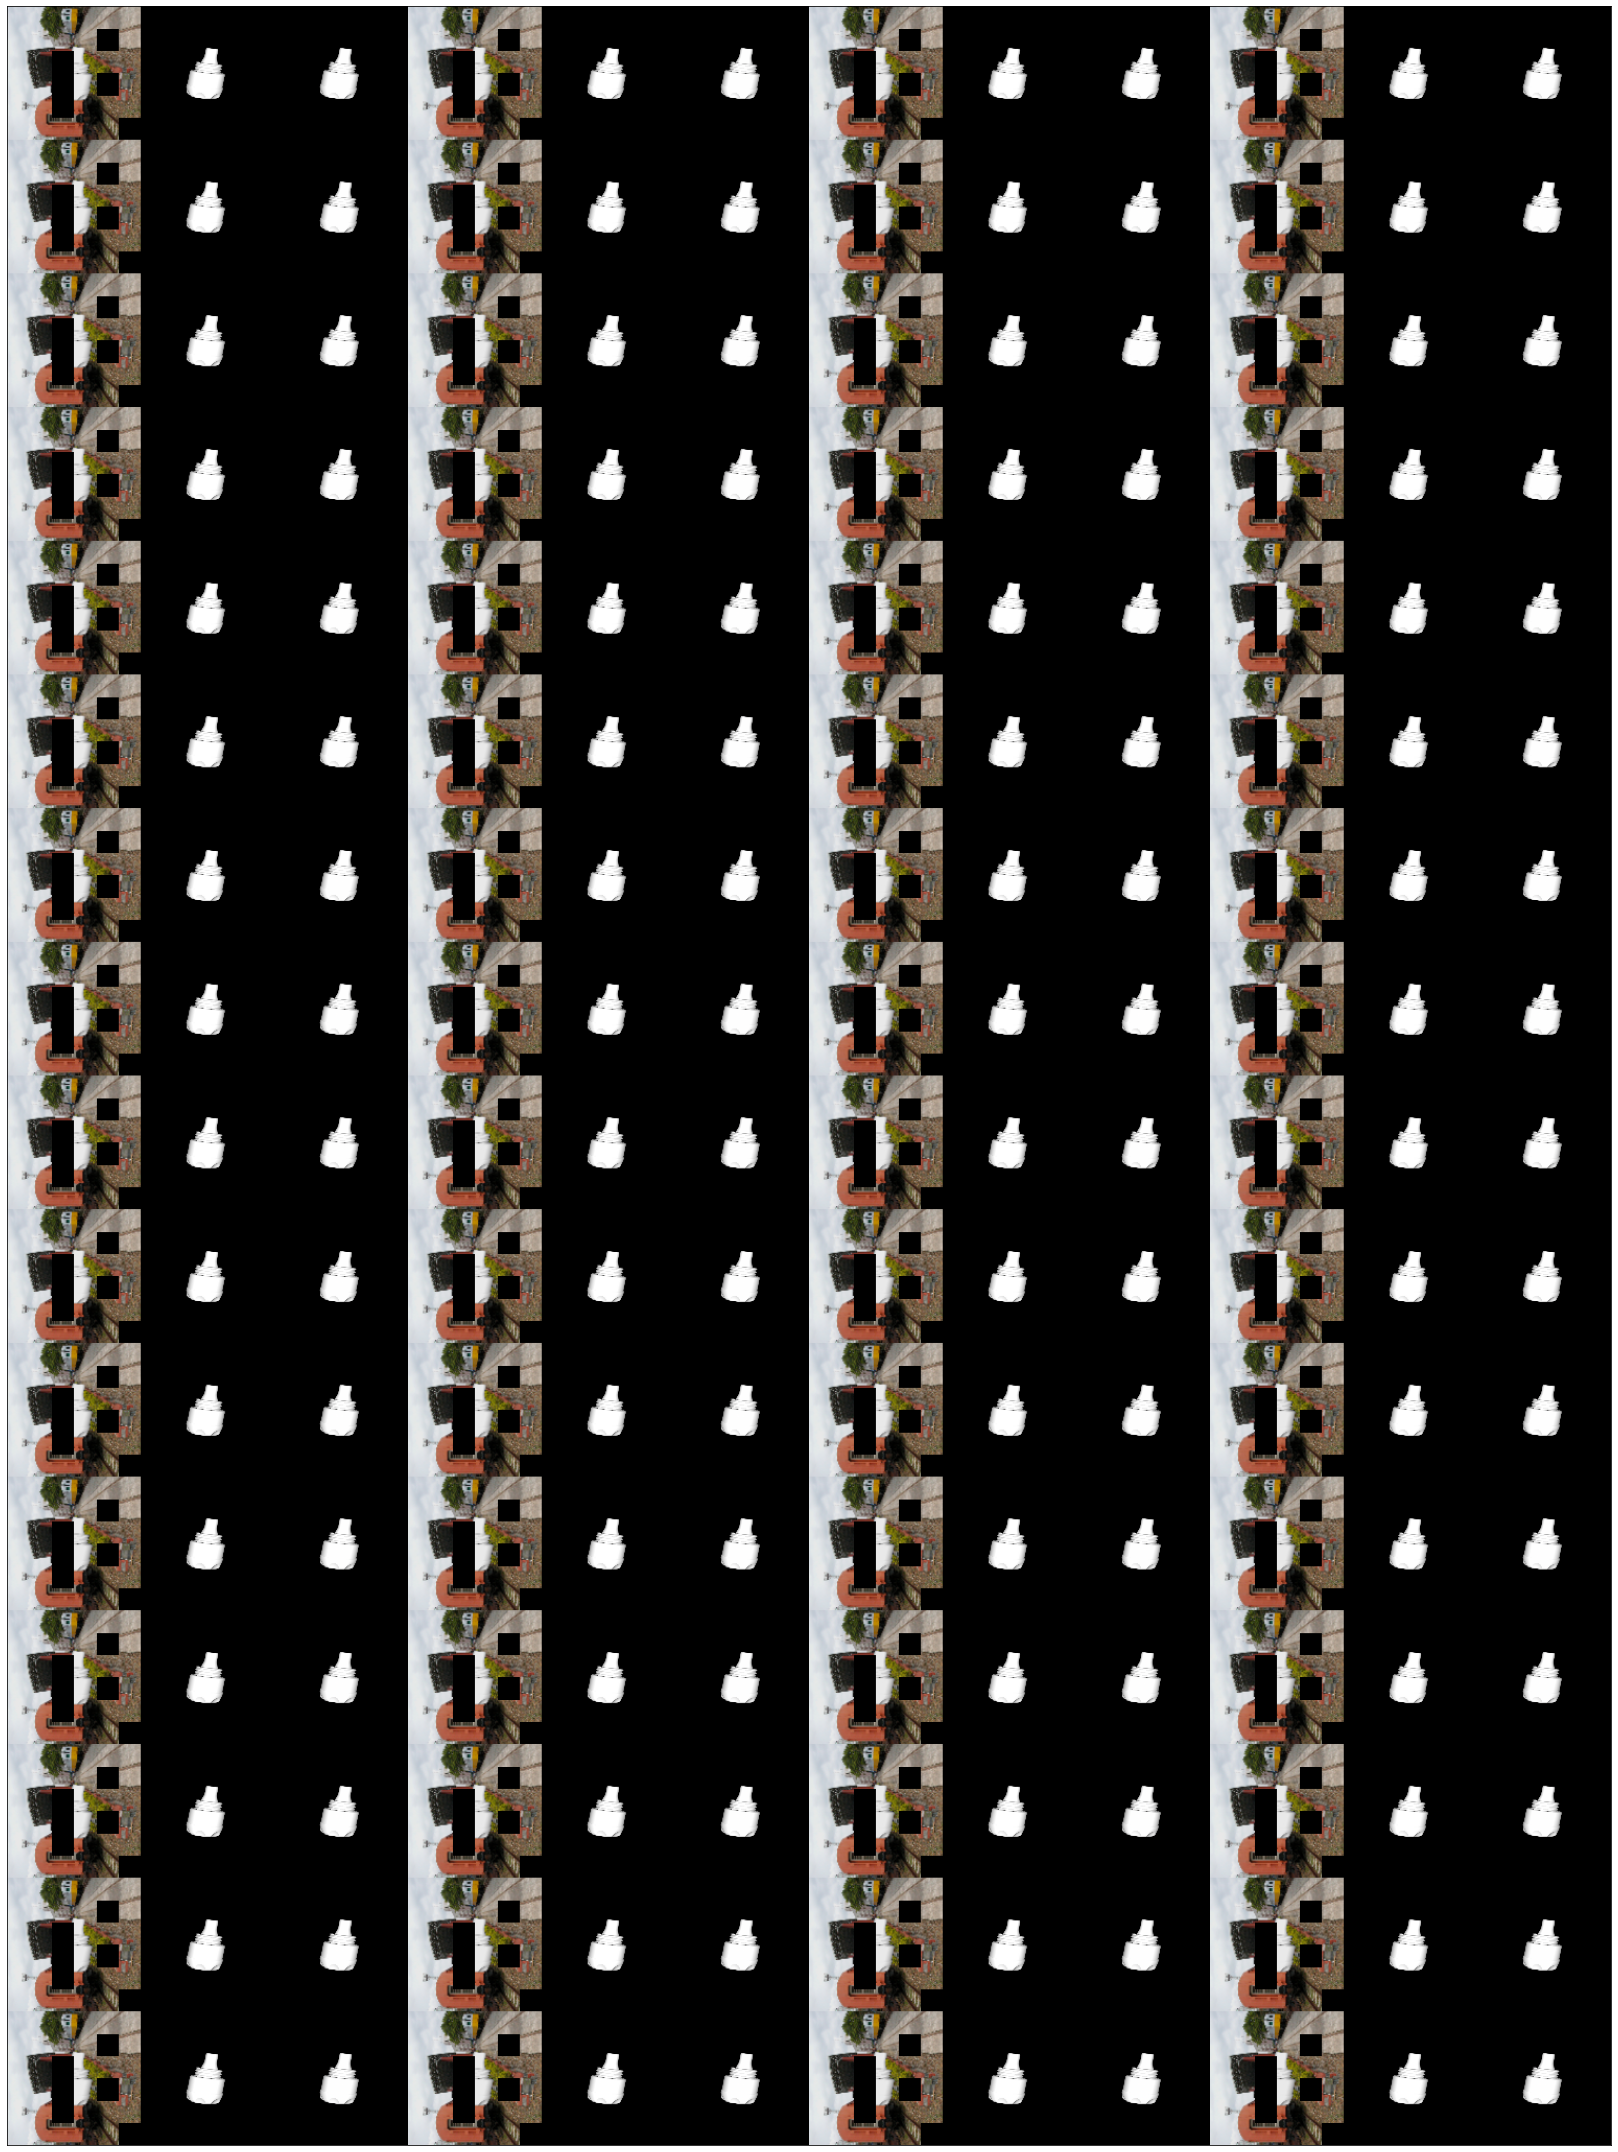

In [3]:
step = im_reels.shape[0] // 4
reel1, reel2 = combine_in_out_imgs(im_reels[:step], -1), combine_in_out_imgs(im_reels[step:step * 2], -1)
reel3, reel4 = combine_in_out_imgs(im_reels[step * 2: step * 3], -1), combine_in_out_imgs(im_reels[step*3:], -1)

split_reel = combine_in_out_imgs((reel1, reel2, reel3, reel4), -2)


plot_im(split_reel)

In [25]:
s = "how_you_doin"

print(f"{5:4f}")

5.000000


In [41]:
s = ()

for i in range(5, 10, 1):
    s = s + (i,)
    
s

(5, 6, 7, 8, 9)